# **Project Name**    -**Unsupervised ML - Netflix Movies and TV Shows Clustering**



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Name    -     Aniket kumar**


# **Project Summary -**

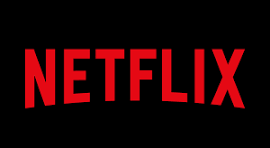

The objective of this project is to analyze and cluster a dataset related to Netflix. The dataset consists of various attributes associated with Netflix shows and movies, such as title, genre, release year, duration, rating, and others. The aim is to explore patterns and similarities among the content available on the platform and group them into meaningful clusters.

To begin with, the dataset will be preprocessed by handling missing values, removing irrelevant columns, and transforming categorical variables into numerical representations. Feature engineering techniques may also be applied to extract useful information from the existing attributes.

Next, exploratory data analysis (EDA) techniques will be utilized to gain insights into the dataset. Visualizations and statistical summaries will be used to understand the distribution of variables, identify any trends, and explore relationships between different features.

Once the dataset has been thoroughly analyzed, clustering algorithms such as k-means, hierarchical clustering, or density-based spatial clustering will be employed. These algorithms will group similar Netflix shows and movies together based on their attributes.** The optimal number of clusters will be determined using techniques like the elbow method or silhouette analysis.**

After the clustering process, the results will be evaluated and interpreted. The clusters will be analyzed to understand the common characteristics and patterns within each group. This analysis will provide valuable information for Netflix in terms of content categorization, recommendation systems, and content acquisition strategies.

Finally, the findings and insights from the clustering analysis will be summarized and presented in a clear and concise manner. Visualizations, charts, and graphs will be used to effectively communicate the outcomes of the project. Recommendations may also be provided based on the identified clusters, suggesting potential improvements or strategies for Netflix to enhance user experience and content offerings.

bold text In conclusion, this project aims to analyze a Netflix dataset, perform clustering techniques to group similar shows and movies together, and provide insights and recommendations based on the clustering results. The project will contribute to a better understanding of Netflix's content landscape and aid in decision-making processes for the company.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.


In this project, we  do following

1. Exploratory Data Analysis.

2. Understanding what type content is available in different countries.

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.

4. Clustering similar content by matching text-based features.

###**Attribute Information**

show_id : Unique ID for every Movie / Tv Show

type : Identifier - A Movie or TV Show

title : Title of the Movie / Tv Show

director : Director of the Movie

cast : Actors involved in the movie / show

country : Country where the movie / show was produced

date_added : Date it was added on Netflix

release_year : Actual Releaseyear of the movie / show

rating : TV Rating of the movie / show

duration : Total Duration - in minutes or number of seasons

listed_in : Genere

description: The Summary description

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')
from datetime import datetime as dt

from scipy.stats import shapiro                                    # hypothesis testing libraries
from scipy.stats import levene
import scipy
from statsmodels.stats.proportion import proportions_ztest
import scipy.stats as stats

import re, string, unicodedata                                      # ml preprocess libraries
import string
string.punctuation
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer, WordNetLemmatizer
nltk.download('punkt')
from nltk import word_tokenize
from nltk.stem.snowball import SnowballStemmer
nltk.download('averaged_perceptron_tagger')
nltk.download('tagsets')
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA

from yellowbrick.cluster import KElbowVisualizer                         # ml libraries
from sklearn.cluster import KMeans
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import silhouette_score

from sklearn.feature_extraction.text import CountVectorizer             # recomender system libraries
from sklearn.metrics.pairwise import cosine_similarity

import pickle

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


### Dataset Loading

In [2]:
# Load Dataset
path = "/content/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv"
# reading csv file
df = pd.read_csv(path)

### Dataset First View

In [34]:
# Dataset First Look
# Showing first five rows
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,Unknown,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [35]:
#Showing Last five rows
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,Unknown,Nasty C,Unknown,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,Unknown,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...
7786,s7787,Movie,ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS,Sam Dunn,Unknown,"United Kingdom, Canada, United States","March 1, 2020",2019,TV-MA,90 min,"Documentaries, Music & Musicals",This documentary delves into the mystique behi...


### Dataset Rows & Columns count

In [36]:
# Dataset Rows & Columns count
print(f'we have total {df.shape[0]} rows and {df.shape[1]} columns.')

we have total 7777 rows and 12 columns.


### Dataset Information

In [37]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7777 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7777 non-null   object
 1   type          7777 non-null   object
 2   title         7777 non-null   object
 3   director      7777 non-null   object
 4   cast          7777 non-null   object
 5   country       7777 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7777 non-null   int64 
 8   rating        7777 non-null   object
 9   duration      7777 non-null   object
 10  listed_in     7777 non-null   object
 11  description   7777 non-null   object
dtypes: int64(1), object(11)
memory usage: 789.9+ KB


#### Duplicate Values

In [38]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [40]:
# Missing Values/Null Values Count
null_value = df.isnull().sum()

# Check if there are any missing values
if null_value.sum() > 0:
    print("Missing values found:")
    print(null_value)
else:
    print("No missing values found.")

No missing values found.


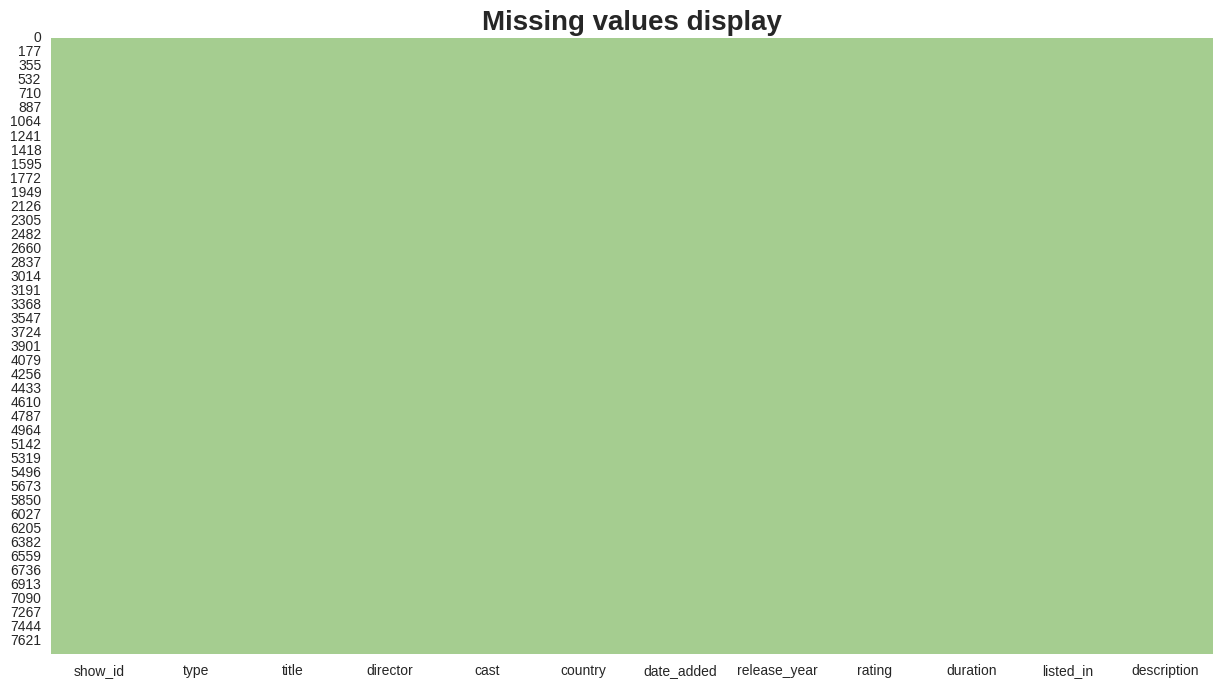

In [41]:
# Visualizing the missing values
plt.figure(figsize=(15,8))
sns.heatmap(df.isnull(),cbar=False,cmap="crest")
plt.title('Missing values display',fontsize=20,fontweight="bold")
plt.show()

In [42]:
# Handling Null Values

df['director'].fillna(value='Unknown',inplace=True)
df['cast'].fillna(value='Unknown',inplace=True)
df['country'].fillna(value='Unknown',inplace=True)
df['rating'].fillna(df['rating'].mode()[0],inplace=True)

df.dropna(axis=0, inplace = True)

In [43]:
#After removing null values
df.shape

(7777, 12)

### What did you know about your dataset?

This dataset contain information about various TV shows and movies available on Netflix, including details like the production country, release year, rating, duration, genre, and a description of each title.

1. This data consists of 12 columns and 7787 rows & after handling null values it contain 7777 rows.

2. In this dataset maximum columns are objective type.

3. There are no duplicated records in the dataset.

4. There are many missing values in director, cast, country, date_added, and rating columns, total 3631 missing values.

## ***2. Understanding Your Variables***

In [45]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
# Dataset Describe
df.describe()

,release_year
count,7777.000000
mean,2013.935965
std,8.760694
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

### Check Unique Values for each variable.

In [46]:
# Check Unique Values for each variable.
df.nunique()
print(df.apply(lambda col: col.unique()))

show_id         [s1, s2, s3, s4, s5, s6, s7, s8, s9, s10, s11,...
type                                             [TV Show, Movie]
title           [3%, 7:19, 23:59, 9, 21, 46, 122, 187, 706, 19...
director        [Unknown, Jorge Michel Grau, Gilbert Chan, Sha...
cast            [João Miguel, Bianca Comparato, Michel Gomes, ...
country         [Brazil, Mexico, Singapore, United States, Tur...
date_added      [August 14, 2020, December 23, 2016, December ...
release_year    [2020, 2016, 2011, 2009, 2008, 2019, 1997, 201...
rating          [TV-MA, R, PG-13, TV-14, TV-PG, NR, TV-G, TV-Y...
duration        [4 Seasons, 93 min, 78 min, 80 min, 123 min, 1...
listed_in       [International TV Shows, TV Dramas, TV Sci-Fi ...
description     [In a future where the elite inhabit an island...
dtype: object


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

In [47]:
# Top countries
df.country.value_counts()

,count
country,
United States,2549
India,923
Unknown,506
United Kingdom,396
Japan,225
...,...
"Russia, United States, China",1
"Italy, Switzerland, France, Germany",1
"United States, United Kingdom, Canada",1


In [48]:
# Genre of shows
df.listed_in.value_counts()

,count
listed_in,
Documentaries,334
Stand-Up Comedy,321
"Dramas, International Movies",320
"Comedies, Dramas, International Movies",243
"Dramas, Independent Movies, International Movies",215
...,...
"Anime Series, Crime TV Shows, TV Thrillers",1
"Crime TV Shows, Romantic TV Shows, Spanish-Language TV Shows",1
"Crime TV Shows, International TV Shows, Reality TV",1


In [49]:
# Choosing the primary country and primary genre to simplify the analysis

df['country'] = df['country'].apply(lambda x: x.split(',')[0])
df['listed_in'] = df['listed_in'].apply(lambda x: x.split(',')[0])

In [50]:
# contry in which a movie was produced
df.country.value_counts()

,count
country,
United States,2877
India,956
United Kingdom,576
Unknown,506
Canada,259
...,...
Zimbabwe,1
Namibia,1
Soviet Union,1


In [51]:
# genre of shows
df.listed_in.value_counts()

,count
listed_in,
Dramas,1384
Comedies,1074
Documentaries,751
Action & Adventure,721
International TV Shows,689
Children & Family Movies,502
Crime TV Shows,369
Kids' TV,357
Stand-Up Comedy,321


In [52]:
# Splitting the duration column, and changing the datatype to integer
df['duration'] = df['duration'].apply(lambda x: int(x.split()[0]))

In [53]:
# Number of seasons for tv shows
df[df['type']=='TV Show'].duration.value_counts()

,count
duration,
1,1608
2,378
3,183
4,86
5,57
6,30
7,19
8,18
9,8


In [54]:
# Movie length in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101,  37, 113, 114, 130,
        94, 140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,
        96, 126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,
        29, 142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57,
       150, 133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,
        38,  25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,
        42,  79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,
        48, 139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165,
       166, 138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,
        14, 177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200,
       169,  27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13,
       214,  17, 173, 192, 209, 187,  41, 182, 224, 233, 189, 15

In [55]:
# Typecasting 'date_added' from string to datetime, using format='mixed' to handle various date formats
df["date_added"] = pd.to_datetime(df['date_added'], format='mixed')

# Adding new attributes month and year of date added
df['month_added'] = df['date_added'].dt.month
df['year_added'] = df['date_added'].dt.year

# first and last date on which a show was added on Netflix
df.date_added.min(),df.date_added.max()

(Timestamp('2008-01-01 00:00:00'), Timestamp('2021-01-16 00:00:00'))

In [57]:
df.drop('date_added', axis=1, inplace=True)

<Axes: xlabel='rating', ylabel='count'>

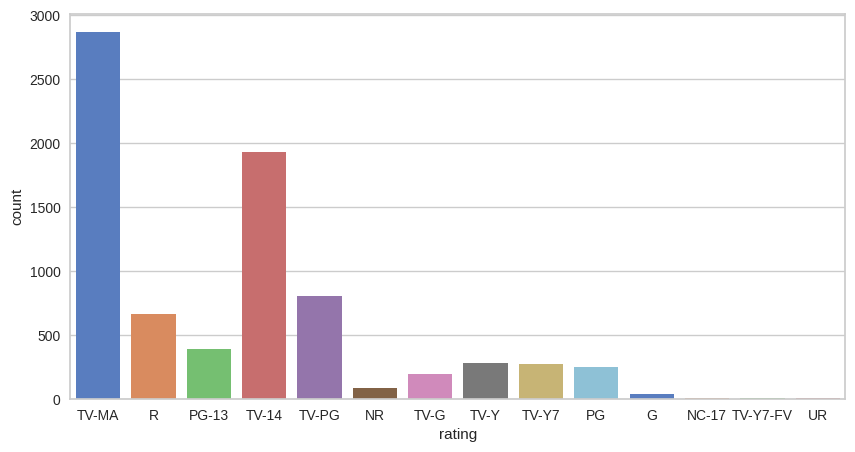

In [58]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='rating',data=df, palette='muted')

In [59]:
# Age ratings
print(list(df.rating.unique()))

['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y', 'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR']


In [60]:
# Changing the values in the rating column
ratings = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}

df['target_ages'] = df['rating'].replace(ratings)
print(list(df.target_ages.unique()))

['Adults', 'Teens', 'Young Adults', 'Older Kids', 'Kids']


<Axes: xlabel='target_ages', ylabel='count'>

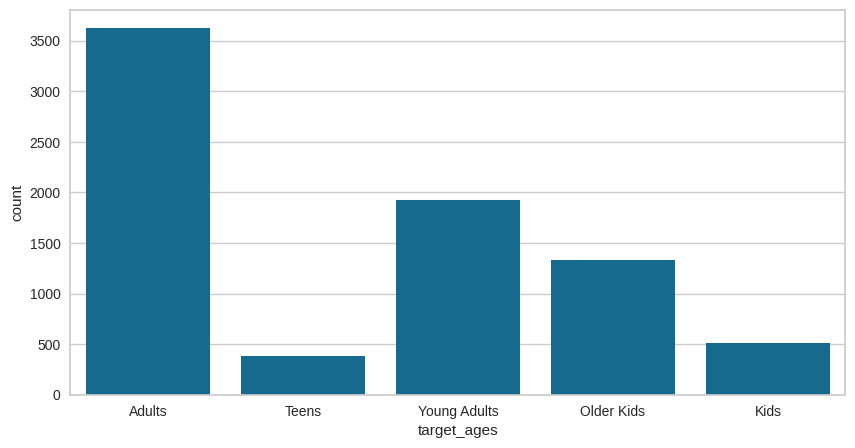

In [61]:
# Age ratings for shows in the dataset
plt.figure(figsize=(10,5))
sns.countplot(x='target_ages',data=df)

### What all manipulations have you done and insights you found?

Around 50% of shows on Netflix are produced for adult audience. Followed by young adults, older kids and kids. Netflix has the least number of shows that are specifically produced for teenagers than other age groups.

1. Check unique values in each columns
2. Choosing the primary country and primary genre to simplify the analysis
3. Change alphanumeric value from duration column, and changing the datatype to integer.
4. Creat new date month & year column
5. Change different ratings to 5 categories

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

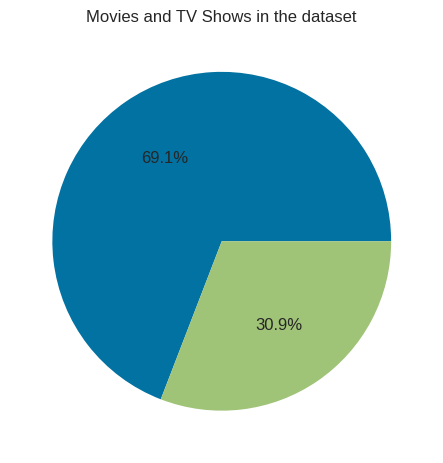

In [62]:
#Number of Movies and TV Shows in the dataset
plt.pie(df['type'].value_counts(), autopct='%1.1f%%')
plt.title('Movies and TV Shows in the dataset')
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors.

##### 2. What is/are the insight(s) found from the chart?

From the above chart, we got to know the % of different types of shows available in netflix. 69.1% of the data belongs to movies and 30.9% of the data for TV shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained from the chart can potentially create a positive business impact by providing valuable information for decision-making. businesses can develop tailored marketing campaigns based on the types of shows most watched by the audience.

#### Chart - 2

In [63]:
#Top 10 Directors on Netflix
plot_2 = df[df['director']!='Unknown'].director.value_counts().reset_index().head(10)
plot_2

,director,count
0,"Raúl Campos, Jan Suter",18
1,Marcus Raboy,16
2,Jay Karas,14
3,Cathy Garcia-Molina,13
4,Youssef Chahine,12
5,Martin Scorsese,12
6,Jay Chapman,12
7,Steven Spielberg,10
8,David Dhawan,9
9,Ryan Polito,8


In [64]:
fig = px.bar(plot_2, x=plot_2['count'], y=plot_2.director, color=plot_2['director'], text_auto=True)
fig.update_layout(
    title = "Top 15 directors with highest number of Movies and Tv Shows",
    xaxis_title = "directors",
    yaxis_title = "Movies Directed"
    )
fig.show()

Text(0.5, 1.0, 'Top 10 movie directors')

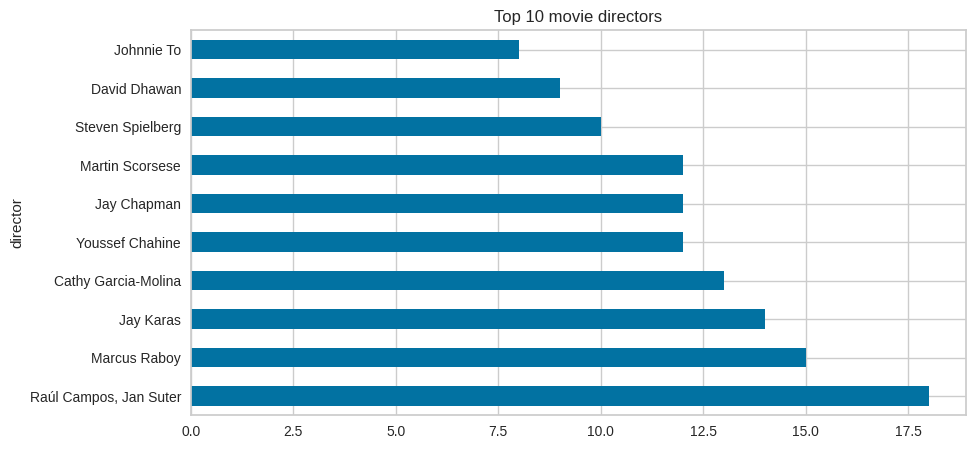

In [65]:
# Top 10 movie directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='Movie')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 movie directors')

Text(0.5, 1.0, 'Top 10 TV show directors')

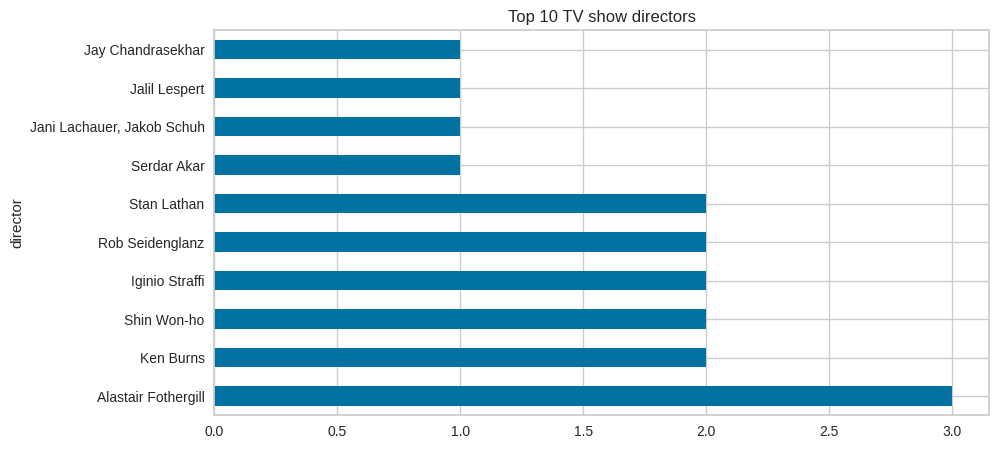

In [66]:
# Top 10 TV show directors
plt.figure(figsize=(10,5))
df[~(df['director']=='Unknown') & (df['type']=='TV Show')].director.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 TV show directors')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that the most popular director in netflix overall & based on movies and tv shows.

Raúl Campos, Jan Suter is most popular director based on movies

Alastair Forthergill is most popular director of the tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

Jan Suter, Raúl Campos, Marcus Raboy, Jay Karas, Cathy Garcia-Molina, Youssef Chahine are the top 5 directors which highest number of movies available in netflix. Alastair Forthergill, Ken Burns, Shin won ho, Iginio Straffi, Rob Seidenglanz are the top 5 directors which highest number of tv shows available in netflix.

#### Chart - 3

In [67]:
# Top 10 Countries with Most Content
plot_3 = df[~(df['country']=='Unknown')].country.value_counts().head(10).reset_index()
plot_3

,country,count
0,United States,2877
1,India,956
2,United Kingdom,576
3,Canada,259
4,Japan,236
5,France,196
6,South Korea,194
7,Spain,168
8,Mexico,123
9,Australia,107


In [68]:
fig = px.bar(plot_3, x=plot_3['count'], y=plot_3.country, color=plot_3['country'], text_auto=True)
fig.update_layout(
    title = "Top 10 countries with the highest number of shows",
    xaxis_title = "countries",
    yaxis_title = "number of shows")
fig.show()

In [69]:
# % share of movies / tv shows by top 3 countries
df.country.value_counts().nlargest(3).sum()/len(df)*100

56.69281213835669

In [70]:
# % share of movies / tv shows by top 10 countries
df.country.value_counts().nlargest(10).sum()/len(df)*100

78.32068921177832

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

1. From above count plot we found that the content belongs to United States alone is 2877 and followed by India is 956.

2. 56.6% contentent created in top 3 contries and 78.3% created by top 10 country.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

1. The United States is a leading producer of both types of shows, this makes sense since Netflix is a US company.

2. Most of the content created on netflix by majorly U.S & India.

#### Chart - 4

Text(0.5, 1.0, 'distribution by released year')

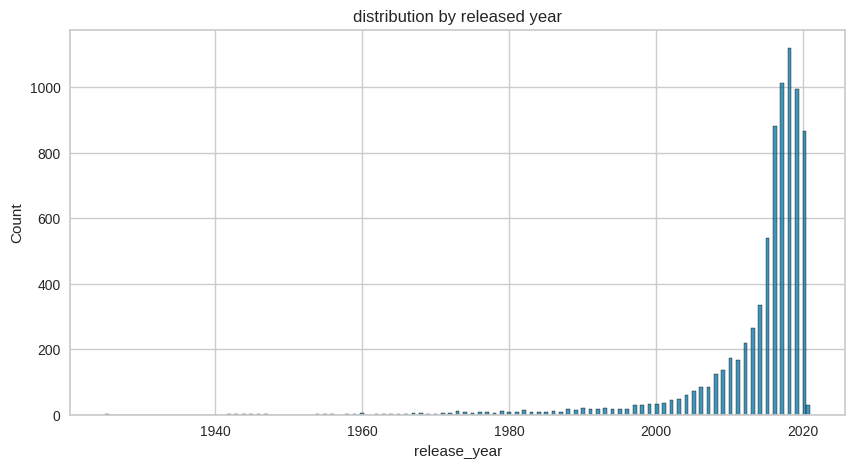

In [71]:
#Content Released Over The Years
# Visualizing the year in which the movie / tv show was released
plt.figure(figsize=(10,5))
sns.histplot(df['release_year'])
plt.title('distribution by released year')

##### 1. Why did you pick the specific chart?

The histogram provides an overview of the distribution of movie release years, this allow comparison of the number of content released in different years.

##### 2. What is/are the insight(s) found from the chart?

The distribution of release years in the histogram shows a general trend of movies being released on Netflix starting from around 1980. The number of releases gradually increases, with significant growth observed from the year 2000 onwards. The highest peak in the distribution is observed between 2010 and 2020, indicating a high number of Movie/Tv shows releases during that period.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the gained insights can help create a positive business impact. By understanding the distribution of release years and identifying trends, businesses can make informed decisions regarding content acquisition, production, and marketing strategies.

#### Chart - 5

In [72]:
# Shows added each month over the years
plot_5 = df['month_added'].value_counts().reset_index()
plot_5

,month_added,count
0,12,833
1,10,785
2,1,757
3,11,738
4,3,669
5,9,619
6,8,618
7,4,601
8,7,600
9,5,543


In [73]:
# Number of shows added on different months
fig = px.bar(plot_5, x=plot_5['count'], y=plot_5['month_added'], color=plot_5['month_added'], text_auto=True)
fig.update_layout(
    title = "Shows added each month over the years",
    xaxis_title = "month",
    yaxis_title = "no Shows added")
fig.show()

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that most of the shows are uploaded either by year ending or beginning.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


From the above insight we got to know:

1. October, November, December, and January are months in which many tv shows and movies get uploaded to the platform.
2. It might be due to the winter, as in these months people may stay at home and watch tv shows and movies in their free time.

#### Chart - 6

Text(0.5, 1.0, 'Top 10 genres')

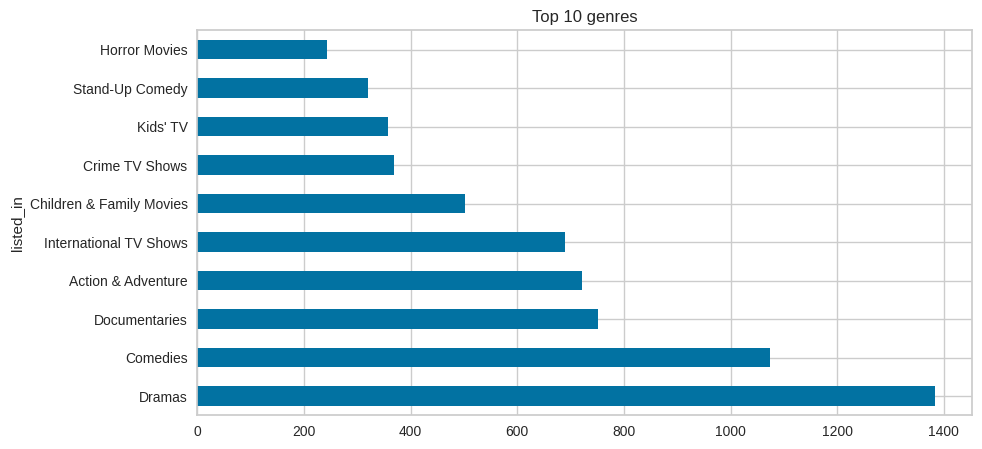

In [74]:
# Top 10 Genres on Netflix
plt.figure(figsize=(10,5))
df.listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres')


In [75]:
# Share of top 3 genres
df.listed_in.value_counts().nlargest(3).sum()/len(df)*100

41.26269769834126

In [76]:
# Share of top 10 genres
df.listed_in.value_counts().nlargest(10).sum()/len(df)*100

82.44824482448246

Text(0.5, 1.0, 'Top 10 genres for movies')

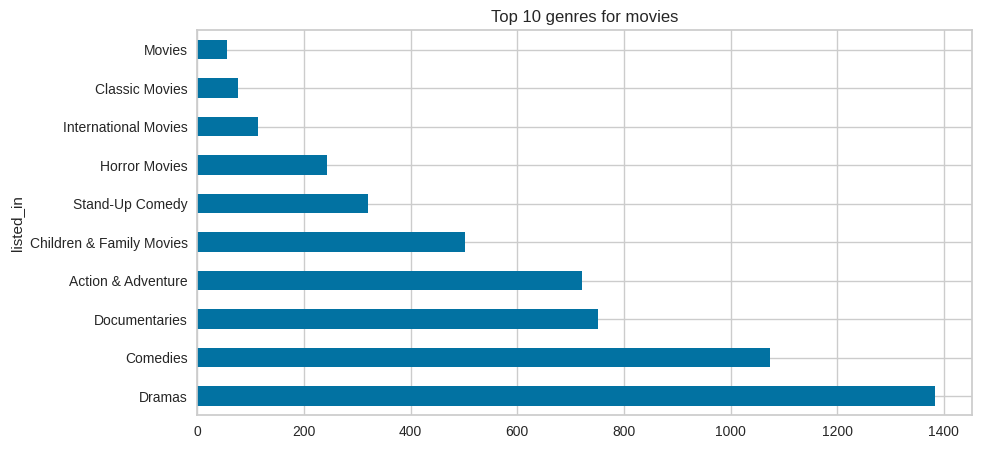

In [77]:
# Top 10 genre for movies
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for movies')

Text(0.5, 1.0, 'Top 10 genres for TV Shows')

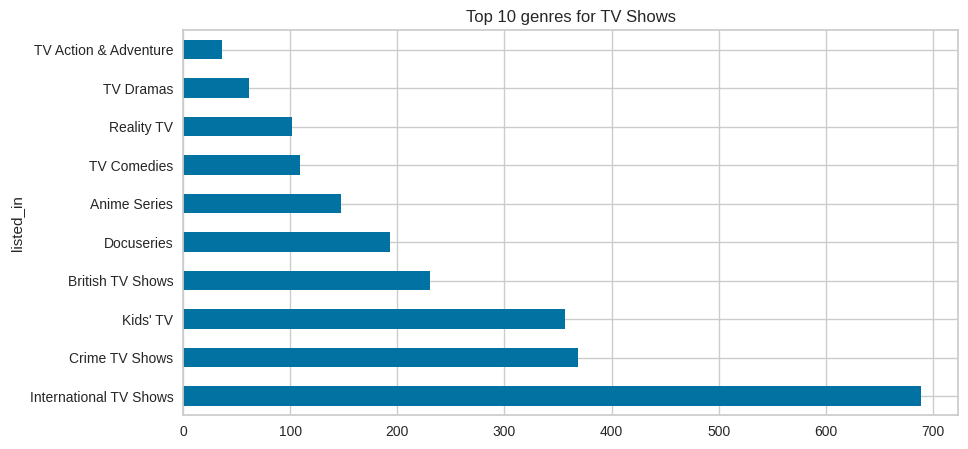

In [78]:
# Top 10 genre for tv shows
plt.figure(figsize=(10,5))
df[df['type']=='TV Show'].listed_in.value_counts().nlargest(10).plot(kind='barh')
plt.title('Top 10 genres for TV Shows')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above graph, it is observed that Drama is in top in Movies and international Tv Show is in top in tv shows.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

1. The dramas is the most popular genre followed by comedies and documentaries.
2. These three genres account for about 41% of all movies and TV shows.
3. This value increases to about 82% for top 10 genres.

#### Chart - 7

In [79]:
# Number of shows added over the years
plot_7 = df['year_added'].value_counts().reset_index()
plot_7

,year_added,count
0,2019,2153
1,2020,2009
2,2018,1685
3,2017,1225
4,2016,443
5,2021,117
6,2015,88
7,2014,25
8,2011,13
9,2013,11


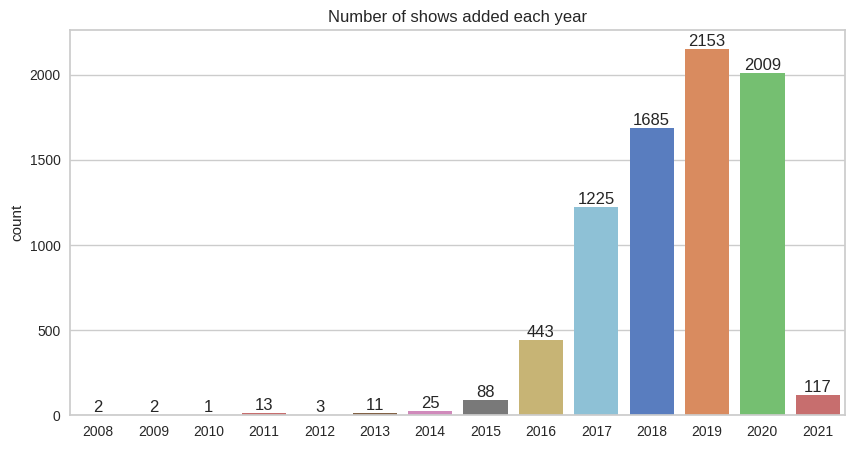

In [80]:
plt.figure(figsize = (10,5))
a = sns.countplot(x=df['year_added'], palette = "muted")
plt.title('Number of shows added each year')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')


In [81]:
tv_show = df[df["type"] == "TV Show"]
yearly_tv_show_count = tv_show['year_added'].value_counts().sort_index()

movie = df[df["type"] == "Movie"]
yearly_movie_count = movie['year_added'].value_counts().sort_index()

In [82]:
fig_1 = go.Scatter(x=yearly_tv_show_count.index, y=yearly_tv_show_count.values, name="TV Shows")
fig_2 = go.Scatter(x=yearly_movie_count.index, y=yearly_movie_count.values, name="Movies")
fig = go.Figure(data=[fig_1, fig_2], layout=go.Layout(title="Content added over the years"))

fig.show()

##### 1. Why did you pick the specific chart?

* Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

* Line graph, is a way to visualize the trend of a single variable over time.

##### 2. What is/are the insight(s) found from the chart?

The trend in the visualization indicates that between 2008 and 2022, there were relatively fewer TV shows and movies added to Netflix. However, starting from 2016, there was a slight increase in content additions. In 2019, there was a significant peak in the number of movies added, while TV shows experienced a similar trend but with a lesser increase compared to movies.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights indicate a positive impact for Netflix as the demand for both TV shows and movies on the platform has been increasing rapidly over the years. This growth presents an opportunity for Netflix to provide more high-quality content to its users, thereby enhancing user satisfaction and engagement.

#### Chart - 8

In [83]:
# No of shows based on rating.
plot_8 = df['rating'].value_counts().reset_index()
plot_8

,rating,count
0,TV-MA,2868
1,TV-14,1928
2,TV-PG,804
3,R,665
4,PG-13,386
5,TV-Y,279
6,TV-Y7,270
7,PG,247
8,TV-G,194
9,NR,83


In [84]:
fig = px.bar(plot_8, x=plot_8['count'], y=plot_8['rating'], color=plot_8['rating'])
fig.update_layout(
    width=900, height=700,
    title = 'No of shows based on ratings',
    xaxis_title = 'rating',
    yaxis_title = 'No of shows'
)
fig.show()

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

From above count plot we can clearly see that the most of the ratings are given by TV-MA followed by TV-14 and the least ratings are given by NC-17.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:

* TV-MA tops the charts, indicating that mature content is more popular on Netflix.
* This popularity is followed by TV-14 and TV-PG, which are Shows focused on Teens and Older kids.
* Very few titles with a rating NC-17 exist. It can be understood since this type of content is purely for the audience above 1

#### Chart - 9

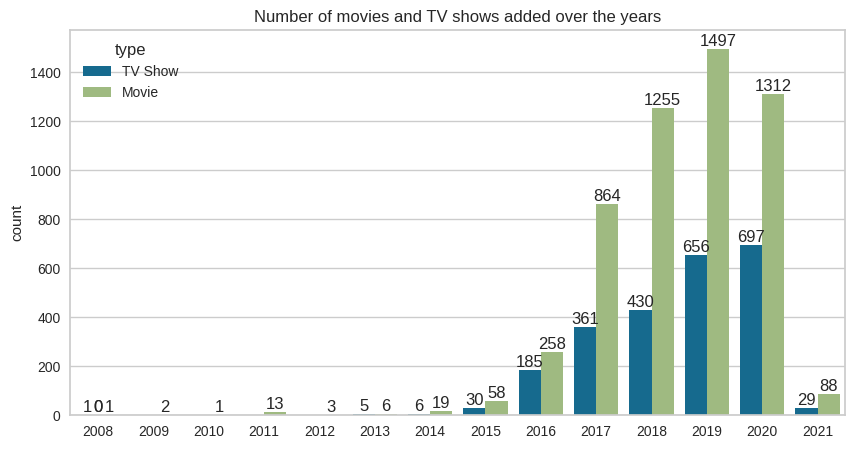

In [85]:
# Number of movies and TV shows added over the years
plt.figure(figsize=(10,5))
a = sns.countplot(x='year_added',data=df, hue='type')
plt.title('Number of movies and TV shows added over the years')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

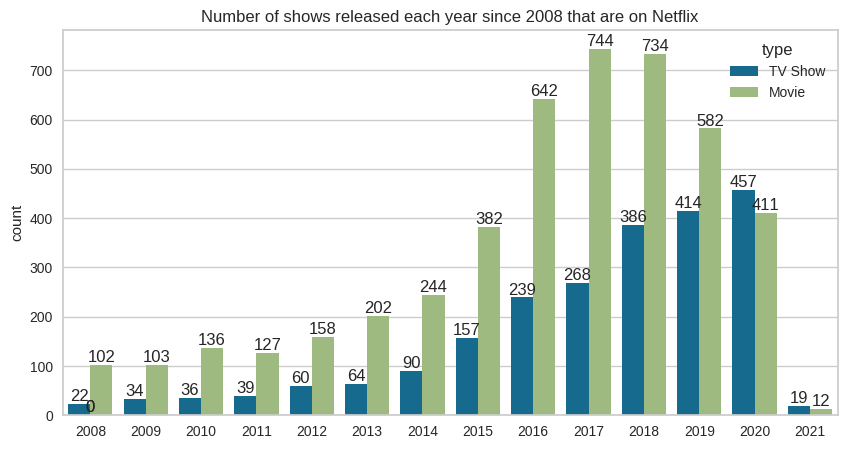

In [86]:
# Number of shows released each year since 2008
order = range(2008,2022)
plt.figure(figsize=(10,5))
a = sns.countplot(x='release_year',data=df, hue='type',
                  order = order)
plt.title('Number of shows released each year since 2008 that are on Netflix')
plt.xlabel('')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

##### 1. Why did you pick the specific chart?

Bar charts are useful for comparing data across different categories, and they can be used to display a large amount of data in a small space.

##### 2. What is/are the insight(s) found from the chart?

* Bar graph highlights that 2017 and 2020 demonstrate the highest trends. These years exhibit a significant number of content release on Netflix.
* Another bar graph show Number of shows released each year since 2008.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, from above insight we got to know:
* Over the years, Netflix has consistently focused on adding more shows in its platform.
* Though there was a decrease in the number of movies added in 2020, this pattern did not exist in the number of TV shows added in the same year.
* This might signal that Netflix is increasingly concentrating on introducing more TV series to its platform rather than movies.

#### Chart - 10

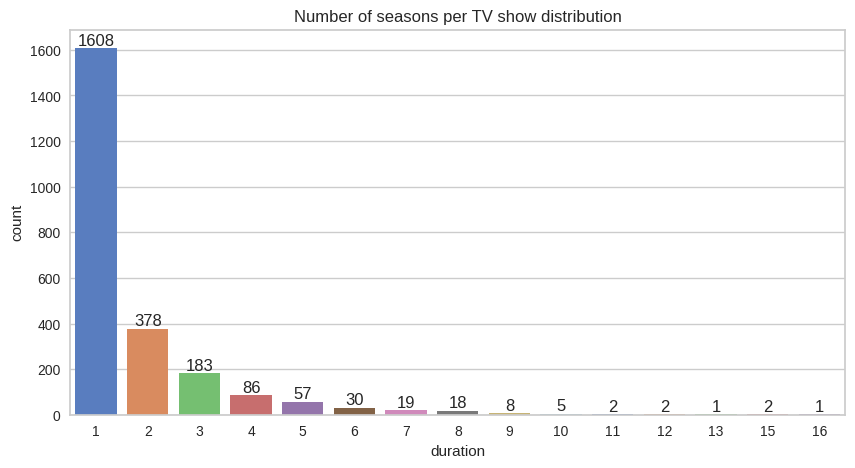

In [87]:
# No of season distributions
# Seasons in each TV show
plt.figure(figsize=(10,5))
a = sns.countplot(x='duration',data=df[df['type']=='TV Show'], palette="muted")
plt.title('Number of seasons per TV show distribution')
for i in a.patches:
    a.annotate(f'{int(i.get_height())}', (i.get_x() + i.get_width() / 2, i.get_height()),
                ha='center', va='bottom')

In [88]:
# % of tv shows with just 1 season
len(df[(df['type']=='TV Show') & (df['duration']==1)])/len(df[df['type']=='TV Show'])*100

67.0

##### 1. Why did you pick the specific chart?

The chart in question is a countplot, which is a type of bar chart that shows the frequency or count of each category in a categorical variable. It seems to be used to display the distribution of TV show seasons.

##### 2. What is/are the insight(s) found from the chart?

From the chart, we observed that the majority of TV shows or web series in the dataset have only one season, while the remaining shows have a maximum of two, three, four, or five seasons.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes because by recognizing that the majority of TV shows have a limited number of seasons, content producers and streaming platforms can optimize their production planning. They can allocate resources more efficiently, reduce production costs, and potentially increase the output of content.

#### Chart - 11

Text(0.5, 1.0, 'Movie duration distribution')

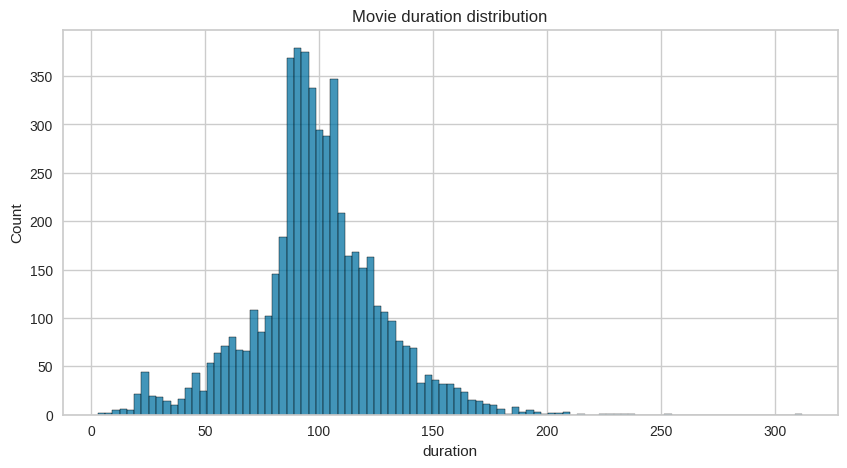

In [89]:
# Duration Distribution for Netflix Movies
# length of movie analysis
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

In [90]:
# Movie statistics
df[df['type']== 'Movie'].duration.describe()

,duration
count,5377.000000
mean,99.307978
std,28.530881
min,3.000000
25%,86.000000
50%,98.000000
75%,114.000000
max,312.000000


##### 1. Why did you pick the specific chart?

A histplot is a type of chart that displays the distribution of a dataset. It is a graphical representation of the data that shows how often each value or group of values occurs. Histplots are useful for understanding the distribution of a dataset and identifying patterns or trends in the data.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we come to know that most of the movies last for 90 to 120 minutes.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

From the above insight we got to know:

* On netflix most of the movies last for 90 to 120 minutes.
* So for target audience, movies duration will be greater than minimum 90 minutes.

#### Chart - 12

Text(0.5, 0, 'Year')

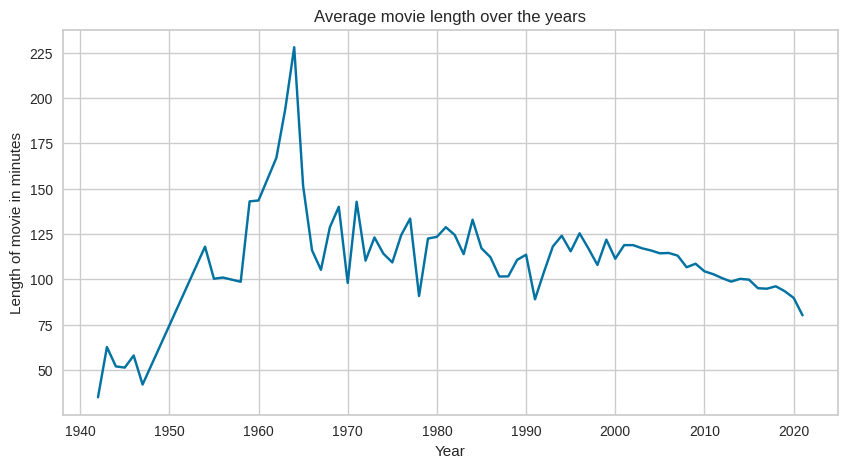

In [91]:
# # Average movie length over the years
plt.figure(figsize=(10,5))
df[df['type']=='Movie'].groupby('release_year')['duration'].mean().plot(kind='line')
plt.title('Average movie length over the years')
plt.ylabel('Length of movie in minutes')
plt.xlabel('Year')

In [92]:
df[df['type']== 'Movie'].release_year.describe()

,release_year
count,5377.000000
mean,2012.920030
std,9.663282
min,1942.000000
25%,2012.000000
50%,2016.000000
75%,2018.000000
max,2021.000000


##### 1. Why did you pick the specific chart?

Line graph, is a way to visualize the trend of a single variable over time.

##### 2. What is/are the insight(s) found from the chart?

* On average, movies made in the 1960s have the longest movie length.
* The average length of a movie has been continuously decreasing since the 2000s.
* Netflix has several movies on its site, including those that were released in way back 1942.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


By this chart we can see what is the duration of movie consumers like to watch over the years and based on this information we can decide future movie length.

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [93]:
# Preparing data for heatmap
df['count'] = 1

# Group by country and sum counts
country_counts = df.groupby('country')['count'].sum().sort_values(ascending=False).reset_index()

# Select the top 10 countries
top_10_countries = country_counts.head(10)['country']

# Filter the original DataFrame to include only the top 10 countries
df_heatmap = df[df['country'].isin(top_10_countries)]

# Create crosstab for the heatmap
df_heatmap = pd.crosstab(df_heatmap['country'], df_heatmap['target_ages'], normalize='index').T
print(df_heatmap)

country         Canada    France     India     Japan    Mexico  South Korea  \
target_ages                                                                   
Adults        0.467181  0.627551  0.259414  0.368644  0.764228     0.463918   
Kids          0.150579  0.086735  0.015690  0.008475  0.016260     0.046392   
Older Kids    0.220077  0.112245  0.163180  0.275424  0.089431     0.123711   
Teens         0.027027  0.030612  0.004184  0.012712  0.016260     0.000000   
Young Adults  0.135135  0.142857  0.557531  0.334746  0.113821     0.365979   

country          Spain  United Kingdom  United States   Unknown  
target_ages                                                      
Adults        0.797619        0.526042       0.489051  0.320158  
Kids          0.035714        0.078125       0.074731  0.169960  
Older Kids    0.053571        0.184028       0.196038  0.235178  
Teens         0.017857        0.071181       0.098366  0.005929  
Young Adults  0.095238        0.140625       0.141

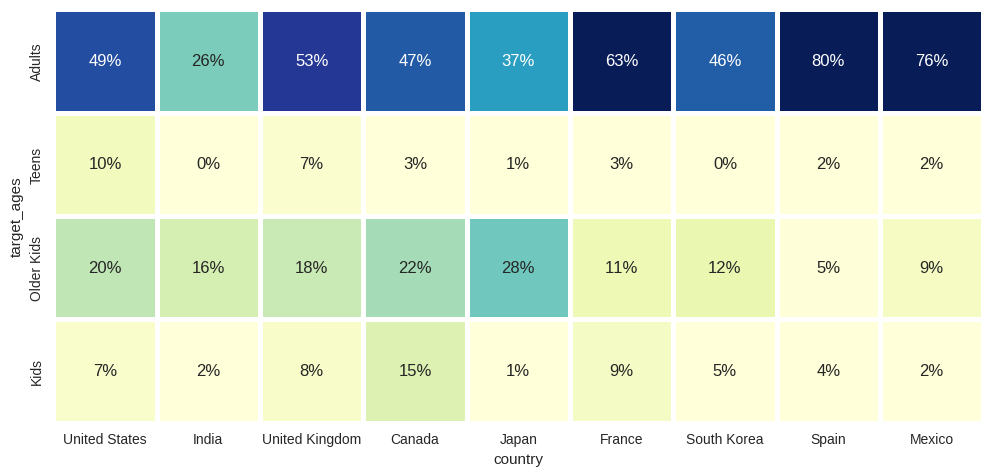

In [94]:
# Correlation Heatmap visualization code
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_order2 = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain', 'Mexico']
age_order = ['Adults', 'Teens', 'Older Kids', 'Kids']

sns.heatmap(data=df_heatmap.loc[age_order, country_order2],
            cmap='YlGnBu',
            square=True,
            linewidth=2.5,
            cbar=False,
            annot=True,
            fmt='1.0%',
            vmax=.6,
            vmin=0.05,
            ax=ax,
            annot_kws={"fontsize": 12})
plt.show()

##### 1. Why did you pick the specific chart?

A heatmap is a suitable choice when visualizing the relationships between two categorical variables, in this case, (countries and age groups) & (Dramas and age range). It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

1. United States, United Kingdom, Canada, France, Spain, Mexico have maximum no of movies for adult age group
2. We can also see that different category of movie targate different age range.

#### Chart - 15 - Pair Plot

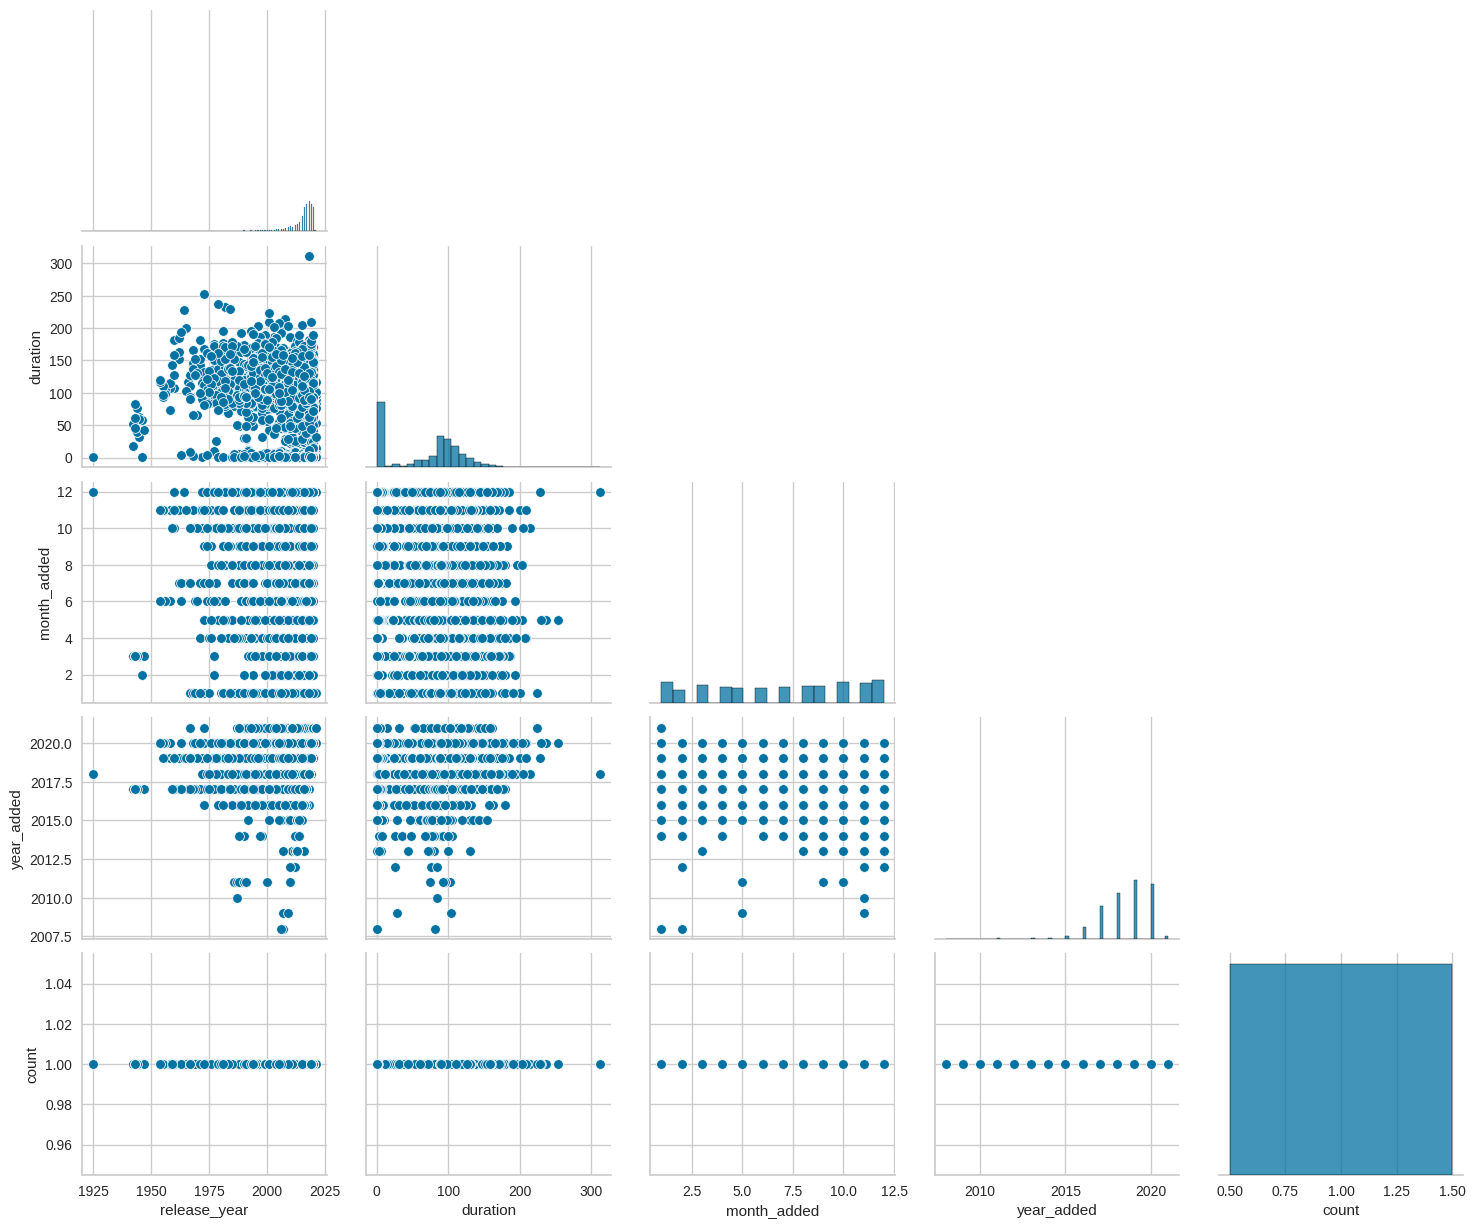

In [95]:
# Pair Plot visualization code
sns.pairplot(df, corner = True,aspect = 1.2)
plt.show()

##### 1. Why did you pick the specific chart?

A pairplot is a suitable choice when visualizing the relationships between different categorical variables. It allows for a clear representation of patterns, trends, and comparisons across different categories.

##### 2. What is/are the insight(s) found from the chart?

1. Based on the plot of release_year and year_added, we can conclude that Netflix is increasingly adding and releasing movies and TV shows over time.

2. We can conclude from plot release_year and month_added that Netflix releases movies and TV shows throughout the all months of the year.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Based on above chart experiments i have noticed that some variable of our netflix dataset does not seems to normally distributed so i have made hypothetical assumption that our data is normally distributed and for that i have decided to do statistical analysis.

Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.
The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

### Hypothetical Statement - 1

####Average number of movies on Netflix in United States is greater than the average number of movies on Netflix in India.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: H0 = Average number of movies on Netflix in United States <= average number of movies on Netflix in India.

Alternate hypothesis: H1 = Average number of movies on Netflix in United States > average number of movies on Netflix in India.

Test Type: Two-sample t-test

In [96]:
us_movie = df[(df['type']=='Movie') & (df.country == 'United States')]
india_movie = df[(df['type']=='Movie') & (df.country == 'India')]

In [97]:
from scipy.stats import shapiro

# Perform the Shapiro-Wilk test for both us_movie and india_movie
shapiro_us_movie = shapiro(us_movie['year_added'])
shapiro_india_movie = shapiro(india_movie['year_added'])

print("Shapiro-Wilk test for us_movie:", shapiro_us_movie)
print("Shapiro-Wilk test for india_movie:", shapiro_india_movie)

Shapiro-Wilk test for us_movie: ShapiroResult(statistic=0.870135123150598, pvalue=1.1899803546739698e-38)
Shapiro-Wilk test for india_movie: ShapiroResult(statistic=0.9069861336638245, pvalue=8.966829902955754e-23)


####**In shapiro test pvalue is greater then 0.05 so data is normally distributed so we can apply Independent 2 sample t-test.**

In [98]:
from scipy.stats import levene

# Perform Levene's test
levene_test = levene(us_movie['release_year'], india_movie['release_year'])
print(levene_test)

LeveneResult(statistic=0.8938562545481896, pvalue=0.34451105868140797)


####**p-value is 0.344, which is greater than 0.05. Therefore, we can conclude that there is no significant difference in the variances of the release years between the US and India movies.**

In [99]:
# Define the null hypothesis
H0 = "Average number of movies on Netflix in United States <= average number of movies on Netflix in India."

# Define the alternative hypothesis
H1 = "Average number of movies on Netflix in United States > average number of movies on Netflix in India."

#### 2. Perform an appropriate statistical test.

In [100]:
# Perform Statistical Test to obtain P-Value
# Perform the two-sample t-test between the release years of the two groups of movies
import scipy
t_stat, p_val = scipy.stats.ttest_ind(us_movie['release_year'], india_movie['release_year'], equal_var=False)

print("t-statistic:", t_stat)
print("p-value:", p_val)

t-statistic: 2.336785044097827
p-value: 0.019560821910762183


In [101]:
# Print the results
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in average number of movies produced by the 'United States' and 'India'.")



Since p-value (0.019560821910762183) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in average number of movies produced by the 'United States' and 'India'.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies available on Netflix in the United States and India, I conducted a two-sample t-test, also known as an independent samples t-test or unpaired t-test. I utilized the ttest_ind function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of two independent samples. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the number of movies between the two countries.

##### Why did you choose the specific statistical test?

I selected the two-sample t-test for this analysis as it is suitable for comparing the means of two independent samples. In this case, we have two separate sets of movies data from Netflix for the United States and India, and we aim to determine if there is a significant difference in the average number of movies between these two countries.

### Hypothetical Statement - 2

####The number of movies available on Netflix is greater than the number of TV shows available on Netflix.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: H0 = The number of movies available on Netflix = the number of TV shows available on Netflix

Alternate hypothesis: H1 = The number of movies available on Netflix != the number of TV shows available on Netflix

Test Type: Two sample z-test

In [102]:
# Count the number of movies and TV shows in the DataFrame
n_movies = df[df['type'] == 'Movie'].count()['type']
n_tv_shows = df[df['type'] == 'TV Show'].count()['type']

In [103]:
# Define the null hypothesis
H0 = "The number of movies available on Netflix = the number of TV shows available on Netflix"

# Define the alternative hypothesis
H1 = "The number of movies available on Netflix != the number of TV shows available on Netflix"

#### 2. Perform an appropriate statistical test.

In [104]:
# Perform Statistical Test to obtain P-Value

from statsmodels.stats.proportion import proportions_ztest

# Set the counts and sample sizes for the z-test
counts = [n_movies, n_tv_shows]  # Number of movies and TV shows
nobs = [len(df), len(df)]  # Total number of observations in the DataFrame

# Perform a two sample z-test assuming equal proportions
z_stat, p_val = proportions_ztest(counts, nobs, value=0, alternative='larger')

# Print the results
print('Z-statistic:', z_stat)
print('P-value:', p_val)

Z-statistic: 47.74059011958195
P-value: 0.0


In [105]:
if p_val < 0.05:
    print(f"Since p-value ({p_val}) is less than 0.05, we reject null hypothesis.\nHence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.")
else:
  print(f"Since p-value ({p_val}) is greater than 0.05, we fail to reject null hypothesis.\nHence, There is no significant difference in number of 'movies' and 'TV shows' available on Netflix.")



Since p-value (0.0) is less than 0.05, we reject null hypothesis.
Hence, There is a significant difference in number of 'movies' and 'TV shows' available on Netflix.


##### Which statistical test have you done to obtain P-Value?

To compare the number of movies and TV shows available on Netflix, I conducted a two-sample z-test for proportions to obtain the p-value.

##### Why did you choose the specific statistical test?

I choose the two-sample z-test for proportions to compare the number of movies and TV shows available on Netflix because the data consists of two categorical variables.

### Hypothetical Statement - 3

####Average Duration of movies on Netflix is 99.30 min.

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null hypothesis: H0 = The average duration of Movie is 99.30 min.

Alternate hypothesis: H1 = The average duration of Movie is not 99.30 min.

Test Type: One-sample t-test

In [106]:
movie_duration = df[df['type']== 'Movie'].duration

print('mean:',movie_duration.mean())
print('standard daviation:',movie_duration.std())
print('variance:',movie_duration.var())

mean: 99.30797842663195
standard daviation: 28.53088078610757
variance: 814.0111584310821


In [107]:
sample_movie_duration = movie_duration.sample(45)


print('mean:',sample_movie_duration.mean())
print('standard daviation:',sample_movie_duration.std())
print('variance:',sample_movie_duration.var())

mean: 98.68888888888888
standard daviation: 30.895588256859163
variance: 954.5373737373737


In [108]:
# Perform the Shapiro-Wilk test for sample_movie_duration
shapiro_sample_movie_duration = shapiro(sample_movie_duration)
print("Shapiro-Wilk test for desktop users:", shapiro_sample_movie_duration)

Shapiro-Wilk test for desktop users: ShapiroResult(statistic=0.9502395159653846, pvalue=0.05186533090207279)


####**in shapiro test pvalue is greater then 0.05 so data is normally distributed so we can apply Single Sample t-test**

In [109]:
# Define the null hypothesis
H0 = ("The average duration of Movie is 99.30")

# Define the alternative hypothesis
H1 = "The average duration of Movie is not 99.30"

#### 2. Perform an appropriate statistical test.

In [110]:
# Perform Statistical Test to obtain P-Value
import scipy.stats as stats
# Calculate the test statistic
t_stat, p_value = stats.ttest_1samp(sample_movie_duration, 99.30)

# Print the results
print("Test statistic:", t_stat)
print("p-value:", p_value/2)

Test statistic: -0.13268748679156514
p-value: 0.4475227512136879


In [111]:

# Conclusion
if p_value/2 < 0.05:
    print(f"Reject the null hypothesis.{H1}")
else:
    print(f"Fail to reject the null hypothesis.{H0}")

Fail to reject the null hypothesis.The average duration of Movie is 99.30


In [112]:
for i in range(10):
  sample_movie_duration = movie_duration.sample(45)
  t_stat, p_value = stats.ttest_1samp(sample_movie_duration, 99.30)
  print("\np-value:", p_value/2)
  if p_value/2 < 0.05:
    print(f"Reject the null hypothesis.{H1}")
  else:
    print(f"Fail to reject the null hypothesis.{H0}")


p-value: 0.22767513077164114
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.4809748447749313
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.16777220280197197
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.2433826121658748
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.34598735953579673
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.13766390095015388
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.3516932360468662
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.10106687582386933
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.2294257465570807
Fail to reject the null hypothesis.The average duration of Movie is 99.30

p-value: 0.17213046266844645
Fail to reject the null hypothesis.The

##### Which statistical test have you done to obtain P-Value?

To compare the movies duration on Netflix, I conducted a One-sample t-test. I utilized the ttest_1samp function from the scipy.stats module to carry out the test, which is suitable for analyzing the means of one independent samples and one value. By applying this test, I was able to calculate the p-value and determine if there is a significant difference in the duration of movies different random samples.

##### Why did you choose the specific statistical test?

I selected the one-sample t-test for this analysis as it is suitable for comparing the means of one independent samples corrosponding to a value. In this case, we take random samples of movies duration data from Netflix, and we aim to determine if there is a significant difference in the average Movie duration in different random samples.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [113]:
df1 = df.copy()

In [114]:
# Handling Missing Values & Missing Value Imputation
df1.isna().sum().sum()

0

#### What all missing value imputation techniques have you used and why did you use those techniques?

Its already handled in data wrangling, so now there are no missing values to handle in the given dataset.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments


##### What all outlier treatment techniques have you used and why did you use those techniques?

Most of the columns are categorical, so no outliers observed.

### 3. Categorical Encoding

(No need as the data is categorical)

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [115]:
# Expand Contraction
# Create a new column called 'clustering' in the DataFrame 'df1'
# This column is to store text data of different column

df1['clustering'] = (df1['director'] + ' ' +
                                df1['cast'] +' ' +
                                df1['country'] +' ' +
                                df1['listed_in'] +' ' +
                                df1['description'])


In [116]:
df1['clustering'][40]

'Muharrem Gülmez Erdem Yener, Ayhan Taş, Emin Olcay, Muharrem Gülmez, Elif Nur Kerkük, Tarık Papuççuoğlu, Suzan Aksoy, Doğa Konakoğlu, Esin Eden, Deniz Özerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

In [117]:

# Define a function to remove non-ascii characters

def remove_non_ascii(words):
    """Function to remove non-ASCII characters"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

In [118]:
# remove non-ascii characters

df1['clustering'] = remove_non_ascii(df1['clustering'])
df1['clustering'][40]

'Muharrem Gulmez Erdem Yener, Ayhan Tas, Emin Olcay, Muharrem Gulmez, Elif Nur Kerkuk, Tark Papuccuoglu, Suzan Aksoy, Doga Konakoglu, Esin Eden, Deniz Ozerman Turkey Comedies The slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 2. Lower Casing

In [119]:
# Lower Casing
# Define a function to convert text into lower cases
def to_lower(x):
  return x.lower()

# Apply the to_lower() function to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(to_lower)

# Cross checking our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener, ayhan tas, emin olcay, muharrem gulmez, elif nur kerkuk, tark papuccuoglu, suzan aksoy, doga konakoglu, esin eden, deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall.'

#### 3. Removing Punctuations

In [120]:

# Remove Punctuations

# function to remove punctuations
def remove_punctuation(text):
    '''a function for removing punctuation'''
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [121]:
# Removing punctuation marks
df1['clustering'] = df1['clustering'].apply(remove_punctuation)

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall'

#### 4. Removing URLs & Removing words and digits contain digits.

In [122]:
# Remove URLs & Remove words and digits contain digits

# 'clustering' column does not have any URLs so remove words and digits containing digits
df1['clustering'] = df1['clustering'].str.replace(r'\w*\d\w*', '', regex=True)

# Cross-check our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies the slacker owner of a public bath house rallies his community to save it when a big developer comes to town to close it down and open a new mall'

#### 5. Removing Stopwords & Removing White spaces

In [123]:
# Remove Stopwords
# import nltk
# from nltk.corpus import stopwords

sw = stopwords.words('english')
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [124]:
# function to remove stop words
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word for word in text.split() if word not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [125]:
# Removing stop words
df1['clustering'] = df1['clustering'].apply(stopwords)

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

In [126]:
# Remove White spaces
df1['clustering'] = df1['clustering'].str.strip()

# Cross-check our result for the function created
df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new mall'

#### 6. Rephrase Text

In [127]:
# Rephrase Text
def rephrase_tags(x):
  return x.replace('mall', 'shoping center')
df1['clustering'] = df1['clustering'].apply(rephrase_tags)

In [128]:

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center'

In [129]:
# function to lemmatize the corpus
def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas

In [130]:
# nltk.download('wordnet')

# Lemmatization
df1['clustering'] = lemmatize_verbs(df1['clustering'])

df1['clustering'][40]

'muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center'

#### 7. Tokenization

In [131]:
# Tokenization

# nltk.download('punkt')

# Apply the tokenization to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(nltk.word_tokenize)

# Cross-check our result that the function worked as expected
print(df1['clustering'][40])

# Store this list form of 'tags' column as 'temp_tags' for later POS tagging purpose
temp_tags = df1['clustering']



['muharrem', 'gulmez', 'erdem', 'yener', 'ayhan', 'tas', 'emin', 'olcay', 'muharrem', 'gulmez', 'elif', 'nur', 'kerkuk', 'tark', 'papuccuoglu', 'suzan', 'aksoy', 'doga', 'konakoglu', 'esin', 'eden', 'deniz', 'ozerman', 'turkey', 'comedies', 'slacker', 'owner', 'public', 'bath', 'house', 'rallies', 'community', 'save', 'big', 'developer', 'comes', 'town', 'close', 'open', 'new', 'shoping', 'center']


In [132]:

print(temp_tags[40])

['muharrem', 'gulmez', 'erdem', 'yener', 'ayhan', 'tas', 'emin', 'olcay', 'muharrem', 'gulmez', 'elif', 'nur', 'kerkuk', 'tark', 'papuccuoglu', 'suzan', 'aksoy', 'doga', 'konakoglu', 'esin', 'eden', 'deniz', 'ozerman', 'turkey', 'comedies', 'slacker', 'owner', 'public', 'bath', 'house', 'rallies', 'community', 'save', 'big', 'developer', 'comes', 'town', 'close', 'open', 'new', 'shoping', 'center']


#### 8. Text Normalization

In [133]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

from nltk.stem.snowball import SnowballStemmer

# Create an object of stemming function
stemmer = SnowballStemmer("english")

# Define a function to Normalize Text function
def stemming(text):
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text]
    return " ".join(text)

# Apply the stemming function to the 'tags' column of the DataFrame
df1['clustering'] = df1['clustering'].apply(stemming)

# Cross-check our result for the function created
df1['clustering'][0]

'unknown joao miguel bianca comparato michel gome rodolfo valent vaneza oliveira rafael lozano vivian porto mel fronckowiak sergio mamberti zeze motta celso frateschi brazil intern tv show futur elit inhabit island paradis far crowd slum get one chanc join save squalor'

##### Which text normalization technique have you used and why?

Here i use Stemming.

Stemming is the process of reducing a word to its stem that affixes to suffixes and prefixes or to the roots of words known as "lemmas". Stemming is important in natural language understanding (NLU) and natural language processing (NLP). Nil means the suffix is replaced with nothing and is just removed. There may be cases where these rules vary depending on the words. As in the case of the suffix 'ed' if the words are 'cared' and 'bumped' they will be stemmed as 'care' and 'bump'.

SnowballStemmer:

Snowball is a small string processing language for creating stemming algorithms for use in Information Retrieval, plus a collection of stemming algorithms implemented using it. It was originally designed and built by Martin Porter. SnowballStemmer() is a module in NLTK that implements the Snowball stemming technique.

#### 9. Part of speech tagging

In [134]:
# POS Taging
# Loading Libraries
# nltk.download('averaged_perceptron_tagger')

# Apply the pos tagging to the 'tags' column of the DataFrame
df1['clustering'] = temp_tags.apply(nltk.pos_tag)

# Cross-check our result for the function created
df1['clustering'][40]


[('muharrem', 'NN'),
 ('gulmez', 'NN'),
 ('erdem', 'NN'),
 ('yener', 'NN'),
 ('ayhan', 'IN'),
 ('tas', 'NNS'),
 ('emin', 'VBP'),
 ('olcay', 'JJ'),
 ('muharrem', 'NN'),
 ('gulmez', 'NN'),
 ('elif', 'NN'),
 ('nur', 'JJ'),
 ('kerkuk', 'NN'),
 ('tark', 'NN'),
 ('papuccuoglu', 'NN'),
 ('suzan', 'NN'),
 ('aksoy', 'NN'),
 ('doga', 'NN'),
 ('konakoglu', 'NN'),
 ('esin', 'NN'),
 ('eden', 'JJ'),
 ('deniz', 'NN'),
 ('ozerman', 'NN'),
 ('turkey', 'NN'),
 ('comedies', 'NNS'),
 ('slacker', 'VBP'),
 ('owner', 'NN'),
 ('public', 'JJ'),
 ('bath', 'NN'),
 ('house', 'NN'),
 ('rallies', 'VBZ'),
 ('community', 'NN'),
 ('save', 'VBP'),
 ('big', 'JJ'),
 ('developer', 'NN'),
 ('comes', 'VBZ'),
 ('town', 'NN'),
 ('close', 'JJ'),
 ('open', 'JJ'),
 ('new', 'JJ'),
 ('shoping', 'VBG'),
 ('center', 'NN')]

In [135]:

# Using this tagset we know that which tag shows which type of POS
# import nltk
# nltk.download('tagsets')
nltk.help.upenn_tagset()

$: dollar
    $ -$ --$ A$ C$ HK$ M$ NZ$ S$ U.S.$ US$
'': closing quotation mark
    ' ''
(: opening parenthesis
    ( [ {
): closing parenthesis
    ) ] }
,: comma
    ,
--: dash
    --
.: sentence terminator
    . ! ?
:: colon or ellipsis
    : ; ...
CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet
CD: numeral, cardinal
    mid-1890 nine-thirty forty-two one-tenth ten million 0.5 one forty-
    seven 1987 twenty '79 zero two 78-degrees eighty-four IX '60s .025
    fifteen 271,124 dozen quintillion DM2,000 ...
DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those
EX: existential there
    there
FW: foreign word
    gemeinschaft hund ich jeux habeas Haementeria Herr K'ang-si vous
    lutihaw alai je jour objets salutaris fille quibusdam pas trop Monte
    terram fiche oui corporis ...
IN: preposition or

In [136]:
# Create a function which gives true word (appropriate word) after pos tagging
def sentence(data):
  x=""
  for i in data:
    a=i[0]+' '
    x=x+a
  return x

# Apply the sentence function to the 'tags' column of the DataFrame
true_word = df1['clustering'].apply(sentence)

# Cross-check our result for the function created
print(true_word[40])


muharrem gulmez erdem yener ayhan tas emin olcay muharrem gulmez elif nur kerkuk tark papuccuoglu suzan aksoy doga konakoglu esin eden deniz ozerman turkey comedies slacker owner public bath house rallies community save big developer comes town close open new shoping center 


In [137]:
true_word.shape

(7777,)

#### 10. Text Vectorization

In [138]:
# Vectorizing Text

# setting max features = 20000 to prevent system from crashing

# Create the object of tfid vectorizer
tfidf = TfidfVectorizer(max_features = 20000)

In [139]:

X = tfidf.fit_transform(true_word).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [140]:

print(tfidf.get_feature_names_out())

['aakash' 'aamir' 'aanand' ... 'zwart' 'zygmunt' 'zylka']


In [141]:

print(X.shape)

(7777, 20000)


In [142]:
vec_data=pd.DataFrame(X)
vec_data

,0,1,2,3,4,5,6,7,8,9,...,19990,19991,19992,19993,19994,19995,19996,19997,19998,19999
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.132909,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7772,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7773,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7774,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
7775,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.487742,0.0,0.0,0.0,0.0,0.0,0.0


##### Which text vectorization technique have you used and why?

I have use TF-IDF techique for vectorization.

TF-IDF stands for term frequency-inverse document frequency and it is a measure, used in the fields of information retrieval (IR) and machine learning, that can quantify the importance or relevance of string representations (words, phrases, lemmas, etc) in a document amongst a collection of documents (also known as a corpus).

I have use TF-IDF because TF-IDF is better than Count Vectorizers because it not only focuses on the frequency of words present in the corpus but also provides the importance of the words. I can then remove the words that are less important for analysis, hence making the model building less complex by reducing the input dimensions.

### 4. Feature Manipulation & Selection

Not Required in this case

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

(No need to transform this data because this data is in form of Text Vectorization)

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

(Here the units of whole data are same so no need to do scaling)

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Yes its needed, because dimensionality reduction removes the least important variables from the model. That will reduce the model's complexity and also remove some noise in the data. Its also helps to mitigate overfitting.

In [143]:
# DImensionality Reduction (If needed)
# Using PCA to reduce dimensionality, this takes time.
pca = PCA()
pca.fit(X)


KeyboardInterrupt: 

In [144]:
# Explained variance for different number of components
plt.figure(figsize=(10,5))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('PCA - Cumulative explained variance vs number of components')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axhline(y= 0.8, color='red', linestyle='--')
plt.axvline(x= 3400, color='green', linestyle='--')

# Display chart
plt.show()

AttributeError: 'PCA' object has no attribute 'explained_variance_ratio_'

<Figure size 1000x500 with 0 Axes>

In [ ]:
# reducing the dimensions to 4000 using pca
pca = PCA(n_components=3400,random_state=42)
pca.fit(X)

In [ ]:
# transformed features
x_pca = pca.transform(X)

In [ ]:
# shape of transformed vectors
x_pca.shape

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

We can use PCA to reduce the dimensionality of data.

Because of the versatility and interpretability of PCA, it has been shown to be effective in a wide variety of contexts and disciplines. Given any high-dimensional dataset, we can start with PCA in order to visualize the relationship between points, to understand the main variance in the data, and to understand the intrinsic dimensionality.

Certainly PCA is not useful for every high-dimensional dataset, but it offers a straightforward and efficient path to gaining insight into high-dimensional data.

### 8. Data Splitting

(Not required)

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

(Not required)

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1  K-Means Clustering

In [ ]:
# ML Model - 1 Implementation

# import warnings
# warnings.filterwarnings('ignore')
# from yellowbrick.cluster import KElbowVisualizer

# Finding optimal number of clusters using the elbow method

# Instantiate the clustering model and visualizer. this takes time.
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4, 22), metric='silhouette', timings=False, locate_elbow=True)

# Fit the data to the visualizer
visualizer.fit(x_pca)

visualizer.show()

In [ ]:
# Instantiate the K-Means clustering model where number of clusters is 6
kmean=KMeans(n_clusters=6)

# Fit the data to the KMean cluster
kmean.fit(x_pca)

# Predict on the model
y_kmean=kmean.predict(x_pca)

In [ ]:
# Adding a new column 'K_mean_cluster' in the dataset
df["K_mean_cluster"]=y_kmean
df.head()

In [ ]:
# Getting unique labels
u_labels = np.unique(y_kmean)

# Plotting the results:
plt.figure(figsize=(10,5))
for i in u_labels:
    plt.scatter(x_pca[y_kmean == i , 0] ,x_pca[y_kmean == i , 1] , label = i)
plt.title('Clusters for K-Means Clustering')
plt.legend()

# Display Chart
plt.show()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:

# Visualizing evaluation Metric Score chart

# Second chart (Scatter plot Graph) shows the result of our algorithm. We can see that cluster wise data distribution in this chart


Here I used K-Means Clustering.

K means number of clusters.

K-means is a centroid-based clustering algorithm, where we calculate the distance between each data point and a centroid to assign it to a cluster. The goal is to identify the K number of groups in the dataset.

K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data. The algorithm looks a little bit like…

(1) Initialize K random centroids.

You could pick K random data points and make those your starting points.

Otherwise, you pick K random values for each variable.

(2) For every data point, look at which centroid is nearest to it.

Using some sort of measurement like Euclidean or Cosine distance.

(3) Assign the data point to the nearest centroid.

(4) For every centroid, move the centroid to the average of the points assigned to that centroid.

(5) Repeat the last three steps until the centroid assignment no longer changes.

The algorithm is said to have “converged” once there are no more changes.

These centroids act as the average representation of the points that are assigned to it. This gives you a story almost right away. You can compare the centroid values and tell if one cluster favors a group of variables or if the clusters have logical groupings of key variables.



#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# First chart gives the optimal number of clusters. We get this chart by validation and basis of some rules


##### Which hyperparameter optimization technique have you used and why?

Here i have use Elbow Method for optimal number of k.

The elbow method is a graphical representation of finding the optimal 'K' in a K-means clustering. It works by finding WCSS (Within-Cluster Sum of Square). i.e. the sum of the square distance between points in a cluster and the cluster centroid.

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters and picking the elbow of the curve as the number of clusters to use.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we can not directly predict the number of cluster. After using Elbow method we can get optimal number of clusters and we can implement it directly.

### ML Model - 2 Hierarchical Clustering (Agglomerative Clustering)

Visualizing the dendrogram to decide on the optimal number of clusters for the agglomerative (hierarchical) clustering algorithm:

In [ ]:
# Building a dendogram to decide on the number of clusters. it takes time.
plt.figure(figsize=(10, 7))
dend = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Netflix Shows')
plt.ylabel('Distance')
plt.axhline(y= 3.8, color='r', linestyle='--')

At a distance of 3.8 units, 9 clusters can be built using the agglomerative clustering algorithm.

Building 9 clusters using the Agglomerative clustering algorithm:


In [ ]:

# Fitting hierarchical clustering model
hierarchical = AgglomerativeClustering(n_clusters=9, affinity='euclidean', linkage='ward')
hierarchical.fit_predict(x_pca)

In [ ]:

# Adding a kmeans cluster number attribute
df['hierarchical_cluster'] = hierarchical.labels_
df.head()

In [ ]:

# Number of movies and tv shows in each cluster
plt.figure(figsize=(10,5))
q = sns.countplot(x='hierarchical_cluster',data=df, hue='type')
plt.title('Number of movies and tv shows in each cluster - Hierarchical Clustering')
for i in q.patches:
  q.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')



Successfully built 12 clusters using the Agglomerative (hierarchical) clustering algorithm.

Building wordclouds for different clusters built.

In [ ]:
# Building a wordcloud for the movie descriptions
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

In [ ]:
# Wordcloud for cluster 0
hierarchical_worldcloud(0)


Keywords observed in cluster 0: life, new, find, family, world, friend, young, two, take

In [ ]:
# Wordcloud for cluster 1
hierarchical_worldcloud(1)

Keywords observed in cluster 1: life, find, love, family, friend, new, young, home, woman, daughter, father

In [ ]:

# Wordcloud for cluster 2
hierarchical_worldcloud(2)

Keywords observed in cluster 2: love, life, family, find, woman, student, school, friend

In [ ]:

# Wordcloud for cluster 3
hierarchical_worldcloud(3)

Keywords observed in cluster 3: documentry, world, family, life, live, explore, team, woman, murder, young, history, series

In [ ]:

# Wordcloud for cluster 4
hierarchical_worldcloud(4)

Keywords observed in cluster 4: stand, special, comedian, stage, show, star, comic, comedy, life, culture

In [ ]:
# Wordcloud for cluster 5
hierarchical_worldcloud(5)

Keywords observed in cluster 5: love, family, life, man, young, father, woman, find, fall, india, mumbai, girl

In [ ]:

# Wordcloud for cluster 6
hierarchical_worldcloud(6)

Keywords observed in cluster 6: young, world, girl, battle, friend, year, demon, student, school, father, group, mysterious

In [ ]:
# Wordcloud for cluster 7
hierarchical_worldcloud(7)

Keywords observed in cluster 7: love, life, woman, new, find, family, korea, secret, world, live, young, two, student

In [ ]:
# Wordcloud for cluster 8
hierarchical_worldcloud(8)

Keywords observed in cluster 8: woman, man, life, find, egyptian, wealthy, father, young, love, criminal, struggling

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

# In wordcloud we observe most popular keywords in different clusters


Here i used Agglomerative Clustering.

Agglomerative Clustering is a type of hierarchical clustering algorithm. It is an unsupervised machine learning technique that divides the population into several clusters such that data points in the same cluster are more similar and data points in different clusters are dissimilar.

Agglomerative Hierarchical Clustering (AHC) is an iterative classification method whose principle is simple.

(1) The process starts by calculating the dissimilarity between the N objects.

(2) Then two objects which when clustered together minimize a given agglomeration criterion, are clustered together thus creating a class comprising these two objects.

(3) Then the dissimilarity between this class and the N-2 other objects is calculated using the agglomeration criterion. The two objects or classes of objects whose clustering together minimizes the agglomeration criterion are then clustered together.

This process continues until all the objects have been clustered.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Here for optimal number of clusters i have use Dendrogram. We decided the number of clusters basis on the some rules and analysis of the graph


##### Which hyperparameter optimization technique have you used and why?

I have use Dendrogram for optimal number of clusters.

A dendrogram is a branching diagram that represents the relationships of similarity among a group of entities. Each branch is called a clade. There is no limit to the number of leaves in a clade.

A dendrogram is a diagram that shows the attribute distances between each pair of sequentially merged classes. To avoid crossing lines, the diagram is graphically arranged so that members of each pair of classes to be merged are neighbors in the diagram. The Dendrogram tool uses a hierarchical clustering algorithm.

A dendrogram is a tree-structured graph used in heat maps to visualize the result of a hierarchical clustering calculation. The result of a clustering is presented either as the distance or the similarity between the clustered rows or columns depending on the selected distance measure

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we get optimal number of cluster is 9.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Here we cannot directly predict the number of cluster . After plotting dendrogram chart we can get optimal number of clusters and we can implement it directly in the data.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Finding optimal number of clusters using the Silhouette Score. it takes time.
for n_clusters in range(2,15):
  km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
  km.fit(x_pca)
  preds = km.predict(x_pca)
  centers = km.cluster_centers_
  score = silhouette_score(x_pca, preds, metric='euclidean')
  print ("For n_clusters = %d, silhouette score is %0.4f"%(n_clusters, score))

From this chart we can say that optimal number of cluster is 13. Because the silhouette score is highest for the cluster 13.

In [ ]:
# Generate Silhouette Plots for Each Clusters

from yellowbrick.cluster import SilhouetteVisualizer

# Instantiate the clustering model and visualizer
for n_clusters in range(2,15):
    km = KMeans (n_clusters=n_clusters, init ='k-means++', random_state=51)
    km.fit(x_pca)
    preds = km.predict(x_pca)
    centers = km.cluster_centers_

    # Set parameters and labels
    score = silhouette_score(x_pca, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

    visualizer = SilhouetteVisualizer(km)

    visualizer.fit(x_pca) # Fit the training data to the visualizer
    visualizer.poof() # Draw/show/poof the data


#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
# Here we define the number of clusters basis on the Silhouette Cofficient

Number of cluster is defined by Silhouette Coefficient.

Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The Silhouette Coefficient is calculated using the mean intra-cluster distance (a) and the mean nearest-cluster distance (b) for each sample. The Silhouette Coefficient for a sample is (b - a) / max(a, b). To clarify, b is the distance between a sample and the nearest cluster that the sample is not a part of.

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:

# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# We decided the number of clusters basis on the some rules and analysis of the graph


##### Which hyperparameter optimization technique have you used and why?

Here we got Silhouette Coefficient for optimal number of clusters. From this data we got optimal number of clusters is 13 because it has a higher Silhouette Coefficient.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Here we cannot directly predict the number of cluster . After using this method we can get optimal number of clusters and we can implement it directly in data.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Silhouette score is the best evaluation metric for optimization the number of clusters.

The optimal number of cluster gives us the lightness and transparency of the business.

Through cluster we can find out which type of customers are in our data.

This evaluation metric makes business decision easier. Getting the Silhouette score is very easy.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

From the charts we can see that K-Mean Clustering model is best model for our data.

Here we get optimal number of clusters is 6, but often the number of clusters is already determined within the business. If the number of clusters within a business is already determined, we can apply the algorithm well.

Within the K-Mean Cluster graph we can see that the clusters are well divided.

Through this cluster we can know what type of data is in which cluster.

The goal of this problems may be to discover groups of similar examples within the data.

The primary function of this algorithm is to perform segmentation, whether it is store, product, or customer. Customers and products can be cluste

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Model explanation of Hierarchical Clustering

1. Import the necessary libraries
2. Load the data
3. Preprocess the data
4. Perform PCA to reduce the dimensionality of the data
5. Create the Agglomerative Clustering model
6. Fit the model to the data
7. Get the cluster labels
8. Calculate the Silhouette Coefficient
9. Print the Silhouette Coefficient
10. Visualize the clusters

###**Content Based Recommender System**

In [ ]:

# Defining a new dataframe for building a recommender system

recommender_df = df1.copy()

In [ ]:
# Changing the index of the df from show id to show title

recommender_df['show_id'] = recommender_df.index

In [ ]:
# converting tokens to string

def convert(lst):
  return ' '.join(map(str, lst))

recommender_df['clustering'] = recommender_df['clustering'].apply(lambda x: convert(x))

In [ ]:
# setting title of movies/Tv shows as index

recommender_df.set_index('title',inplace=True)

In [ ]:
# Count vectorizer

CV = CountVectorizer()
converted_matrix = CV.fit_transform(recommender_df['clustering'])

In [ ]:
# Cosine similarity

cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
cosine_similarity.shape


In [ ]:
# Developing a function to get 10 recommendations for a show

indices = pd.Series(recommender_df.index)

def recommend_10(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    idx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[idx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(recommender_df.index)[i])
    print("If you liked '"+title+"', you may also enjoy:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:

# Recommendations for 'A Man Called God'
recommend_10('A Man Called God')

In [ ]:
# Recommendations for 'Stranger Things'
recommend_10('Stranger Things')

In [ ]:

# Recommendations for 'Peaky Blinders'
recommend_10('Peaky Blinders')

In [ ]:
# Recommendations for 'Lucifer'
recommend_10('Lucifer')

In [ ]:
# Testing Recommender System on a Indian Movie
recommend_10('Zindagi Na Milegi Dobara')

In [ ]:
# Testing Recommender System on a International Movie
recommend_10('Avengers: Infinity War')

In [ ]:
# Testing Recommender System on a Korean TV Show
recommend_10('What in the World Happened?')

In [ ]:
# Testing Recommender System on a Content, Which is Not Listed in Netflix Dataset
recommend_10('Avenger')

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

import pickle

# Serialize process (wb=write byte)
# Save the best model (KMeans Clustering)
pickle.dump(kmean,open('kmeans_model.pkl','wb'))


### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

# Unserialize process (rb=read byte)
pickled_model= pickle.load(open('kmeans_model.pkl','rb'))

# Predicting the unseen data
pickled_model.predict(x_pca)

In [ ]:

y_kmean

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The objective of the project was to cluster TV shows and movies based on their similarities and differences, with the ultimate goal of creating a content-based recommender system that recommends 10 shows to users based on their viewing history. Some key points from the project include:

Exploring the dataset consist of 7787 records and 12 attributes, with a focus on missing value imputation and exploratory data analysis (EDA).

The analysis revealed that Netflix has a greater number of movies than TV shows, with a rapidly growing collection of shows from the United States.

To cluster the shows, i have selected six key attributes: director, cast, country, genre, rating, and description (all are categorical variables). These attributes were transformed into a 20000-feature TF-IDF vectorization, and Principal Component Analysis (PCA) was used to address the curse of dimensionality. Captured more than 80% of the variance by reducing the components to 3400.

Next, i used K-Means and Agglomerative clustering algorithms to group the shows. The elbow method confirmed that the optimal number of clusters was 6 for K-Means, however for Silhouette score analysis it was 13.

In Agglomerative clustering the optimal number of clusters was 9, which we visualized with a dendrogram.

Continued all the efforts by creating a content-based recommender system using the similarity matrix obtained through cosine similarity.

The recommender system offers personalized recommendations based on the type of shows the user has watched and provides the user with ten top-notch suggestions to explore.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***